# load dữ liệu

#import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("pima-indians-diabetes.data.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
corr = df.corr()
pd.set_option("display.width", 400)
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  DiabetesPedigreeFunction       Age   Outcome
Pregnancies                  1.000000  0.129459       0.141282      -0.081672 -0.073535  0.017683                 -0.033523  0.544341  0.221898
Glucose                      0.129459  1.000000       0.152590       0.057328  0.331357  0.221071                  0.137337  0.263514  0.466581
BloodPressure                0.141282  0.152590       1.000000       0.207371  0.088933  0.281805                  0.041265  0.239528  0.065068
SkinThickness               -0.081672  0.057328       0.207371       1.000000  0.436783  0.392573                  0.183928 -0.113970  0.074752
Insulin                     -0.073535  0.331357       0.088933       0.436783  1.000000  0.197859                  0.185071 -0.042163  0.130548
BMI                          0.017683  0.221071       0.281805       0.392573  0.197859  1.000000                  0.140647  0.036242  0

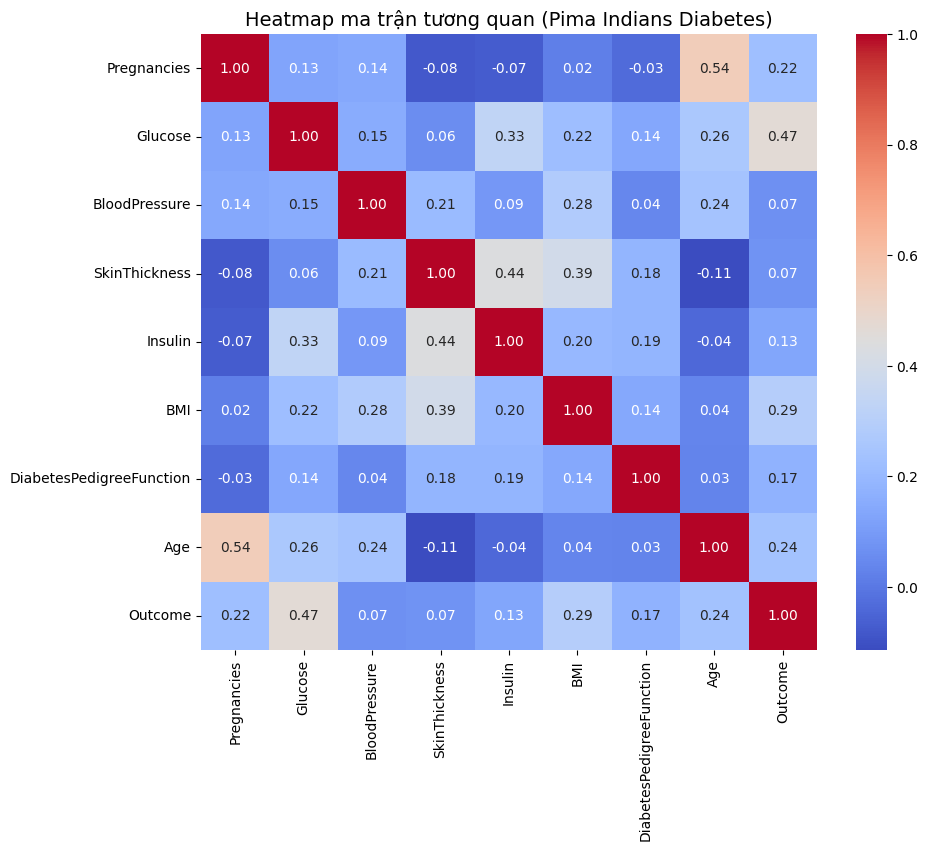

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title("Heatmap ma trận tương quan (Pima Indians Diabetes)", fontsize=14)
plt.show()

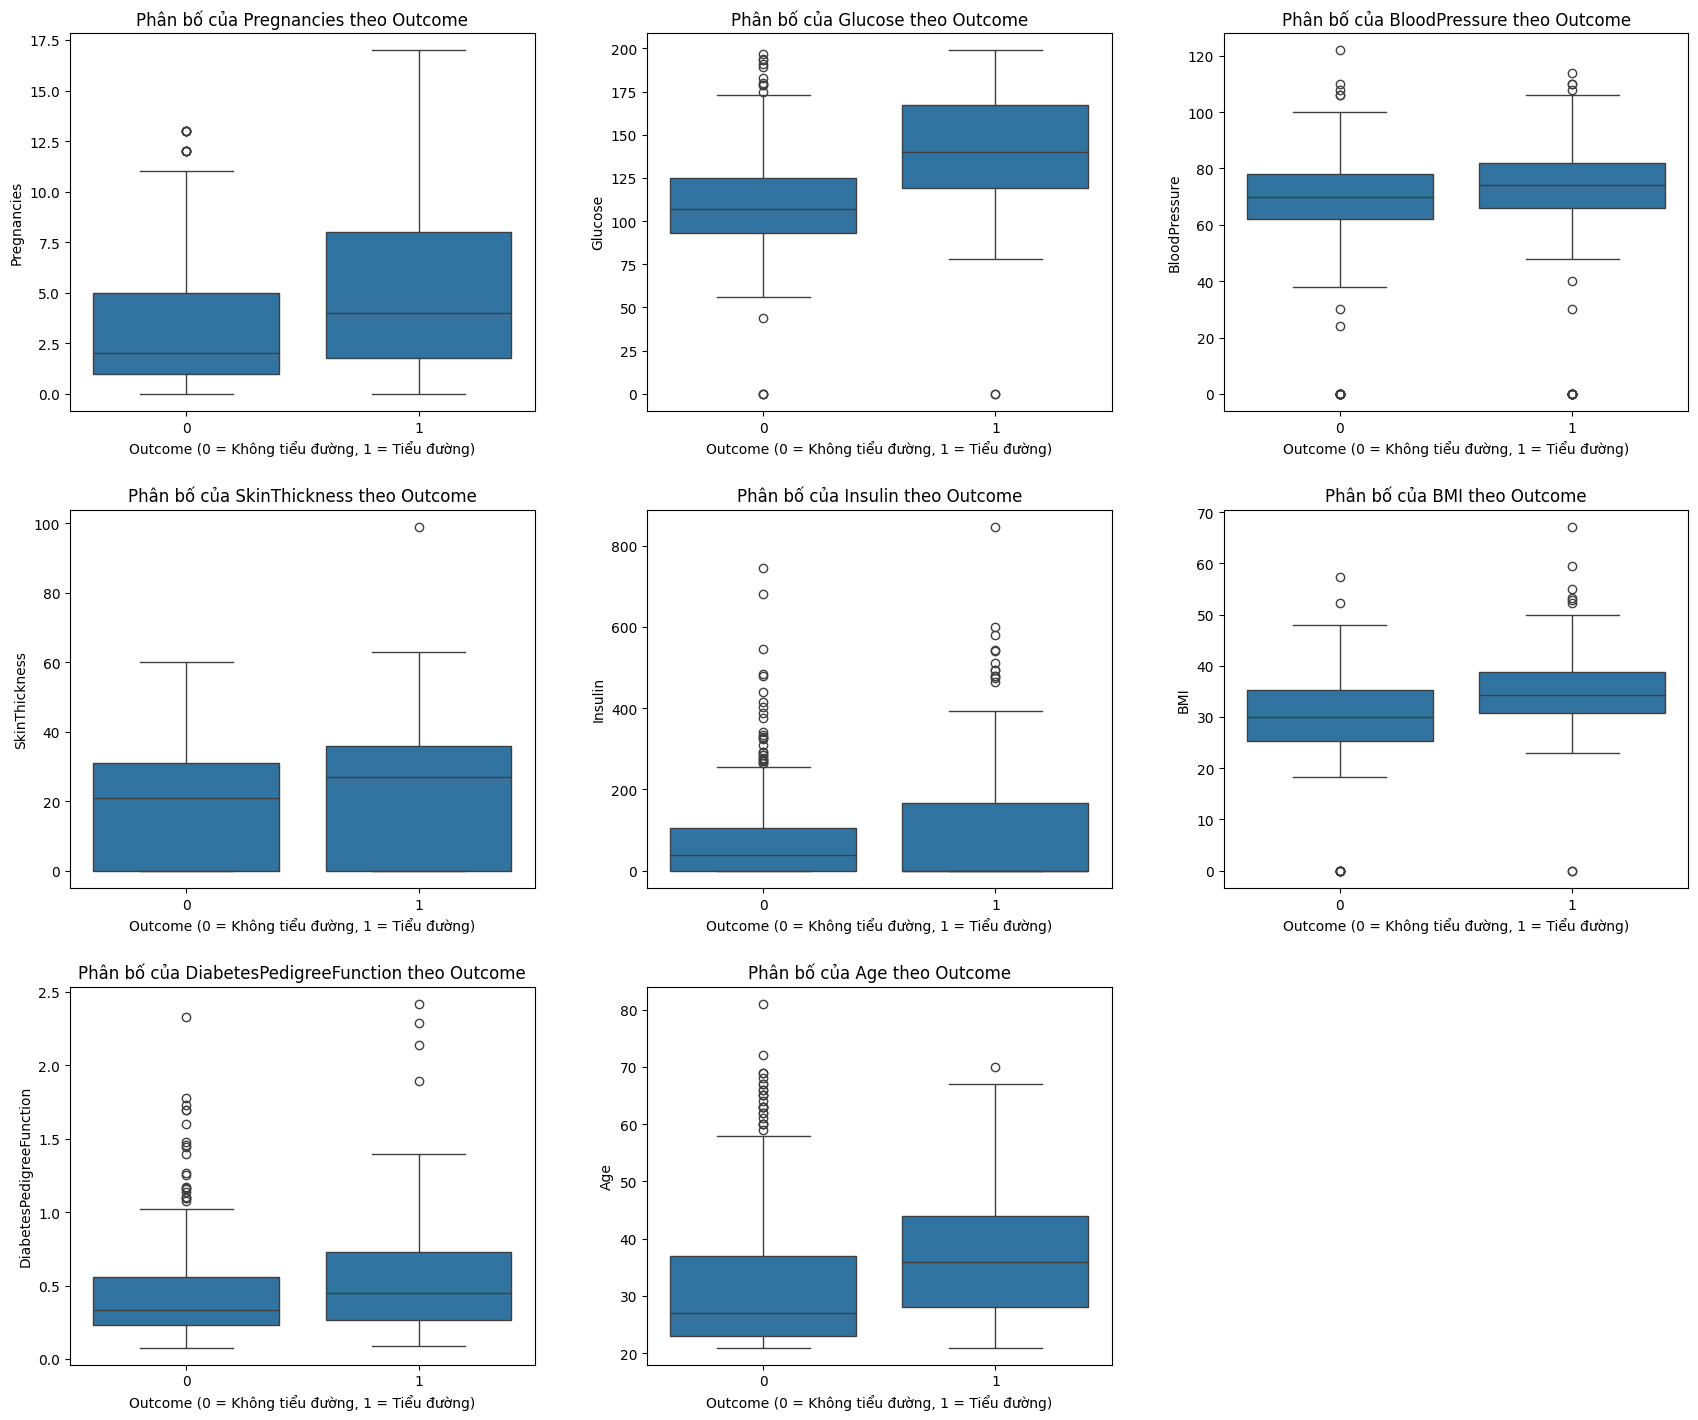

In [13]:
# Tạo một figure với nhiều subplot để hiển thị tất cả các biểu đồ
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
fig.tight_layout(pad=5.0)  # Điều chỉnh khoảng cách giữa các biểu đồ

# Lấy danh sách các cột thuộc tính, loại trừ cột 'Outcome'
features = df.columns.drop('Outcome')

# Lặp qua từng thuộc tính và vẽ biểu đồ
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3

    # Sử dụng biểu đồ boxplot để so sánh phân bố của từng thuộc tính
    # giữa hai nhóm Outcome (0 và 1)
    sns.boxplot(x='Outcome', y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Phân bố của {feature} theo Outcome')
    axes[row, col].set_xlabel('Outcome (0 = Không tiểu đường, 1 = Tiểu đường)')

# Ẩn subplot cuối cùng vì chỉ có 8 thuộc tính
axes[2, 2].axis('off')

plt.show()

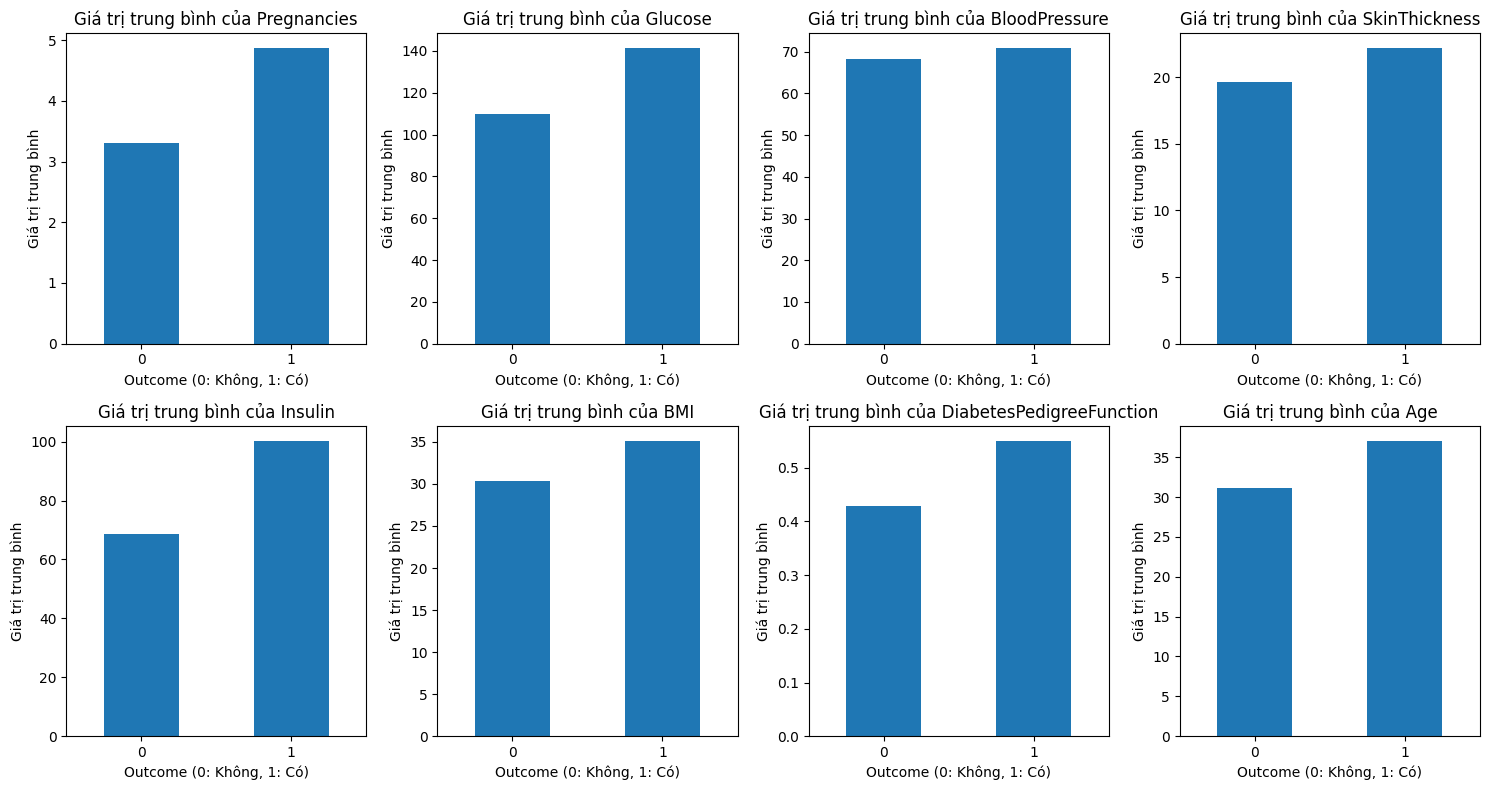

In [6]:
# Tính giá trị trung bình của từng thuộc tính cho mỗi nhóm Outcome
# df.groupby('Outcome').mean() sẽ nhóm dữ liệu theo cột 'Outcome' và tính trung bình cho tất cả các cột còn lại
mean_by_outcome = df.groupby('Outcome').mean()

# Lấy danh sách các thuộc tính (cột)
features = mean_by_outcome.columns

# Thiết lập kích thước của biểu đồ
plt.figure(figsize=(15, 8))

# Lặp qua từng thuộc tính và vẽ biểu đồ cột
for i, feature in enumerate(features):
    # Tạo một subplot cho mỗi thuộc tính
    plt.subplot(2, 4, i + 1)
    
    # Vẽ biểu đồ cột
    mean_by_outcome[feature].plot(kind='bar')
    
    # Đặt tiêu đề và nhãn
    plt.title(f'Giá trị trung bình của {feature}', fontsize=12)
    plt.xlabel('Outcome (0: Không, 1: Có)', fontsize=10)
    plt.ylabel('Giá trị trung bình', fontsize=10)
    plt.xticks(rotation=0)

plt.tight_layout() # Điều chỉnh layout để tránh các tiêu đề bị chồng lấn
plt.show()

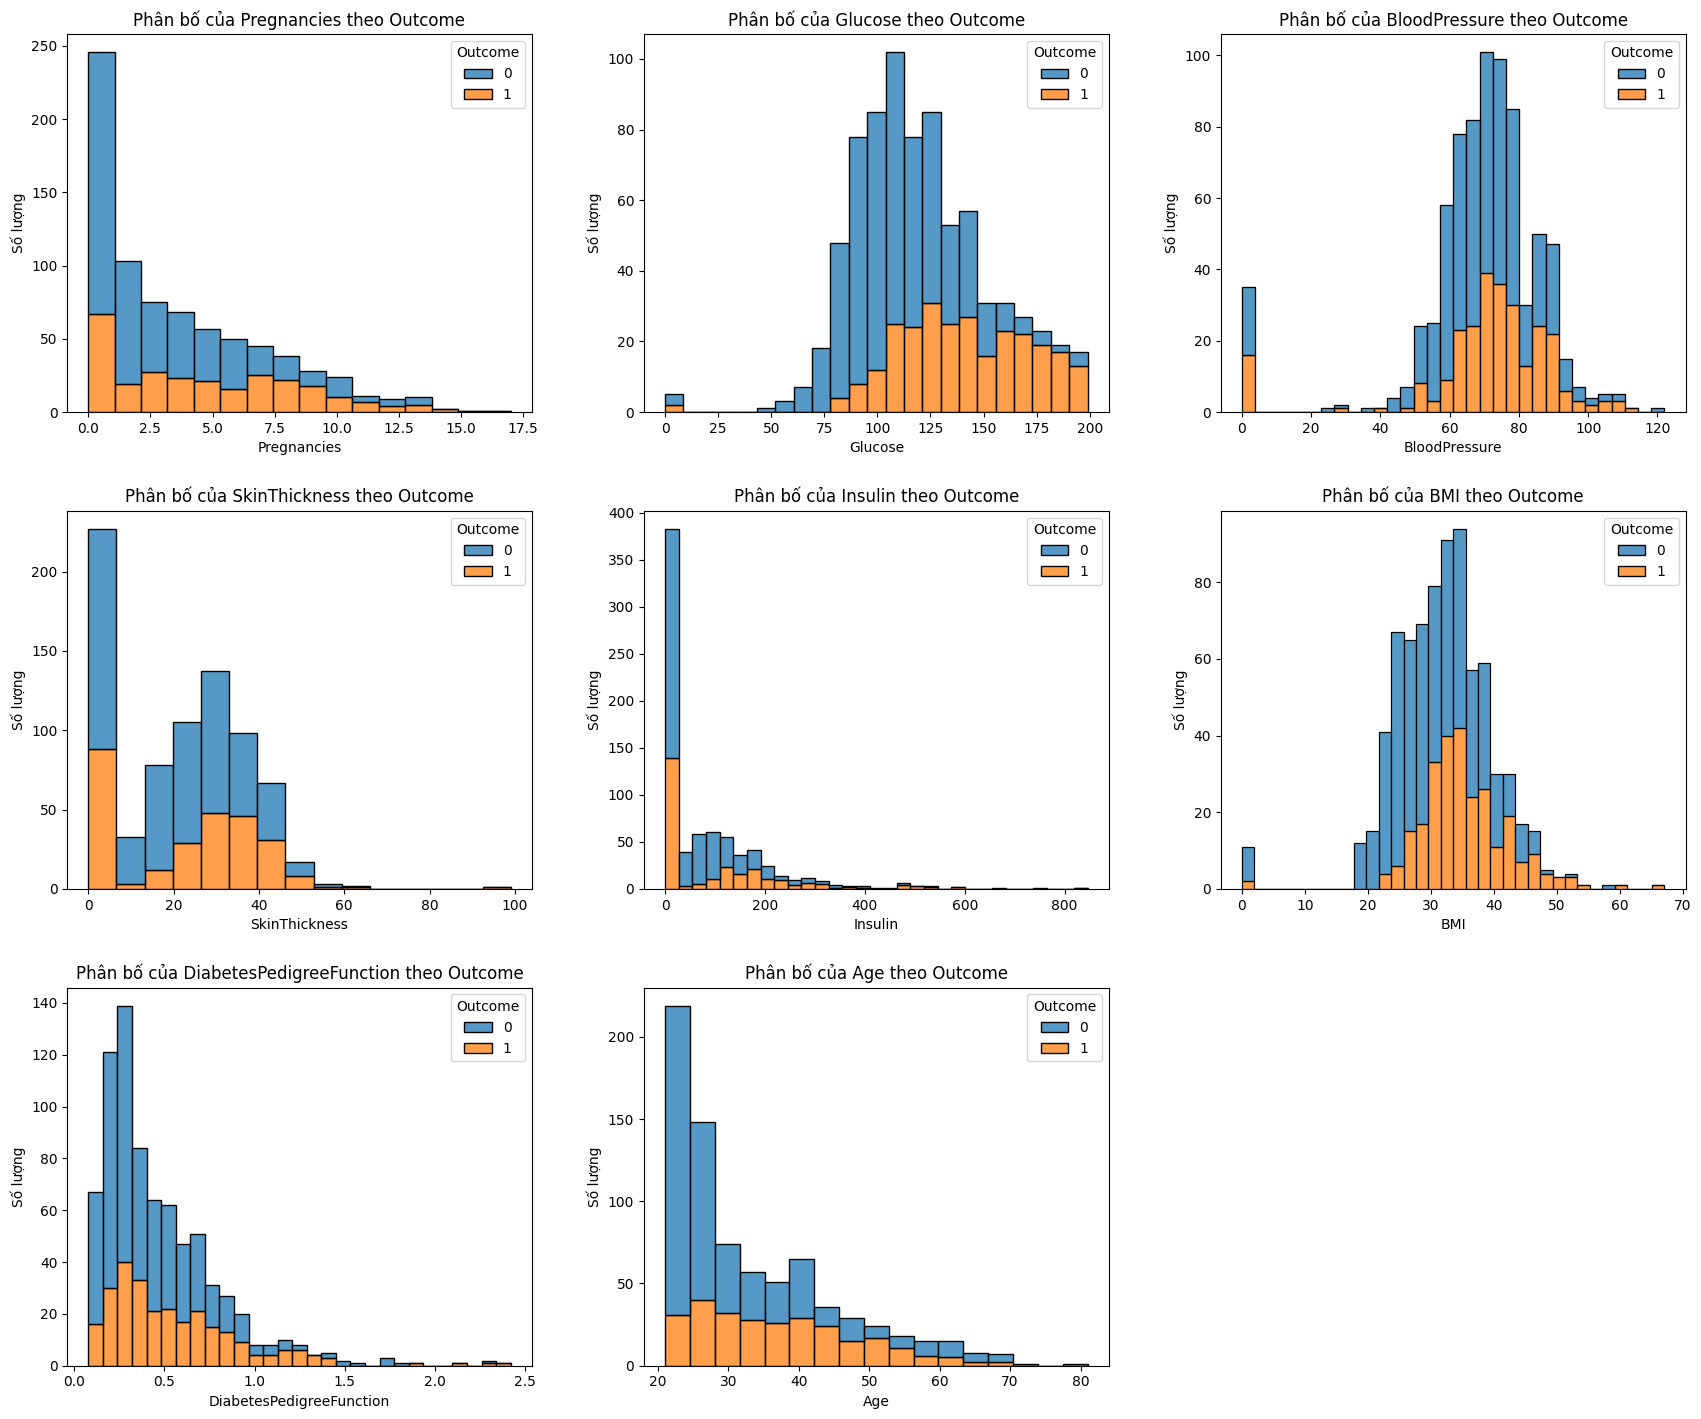

In [7]:
features = df.columns.drop('Outcome')

# Tạo một figure với nhiều subplot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
fig.tight_layout(pad=5.0)  # Điều chỉnh khoảng cách giữa các biểu đồ

# Lặp qua từng thuộc tính và vẽ biểu đồ tần số
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3

    # Sử dụng sns.histplot để vẽ biểu đồ tần số
    # data=df: DataFrame đầu vào
    # x=feature: Thuộc tính trên trục hoành
    # hue='Outcome': Phân tách dữ liệu thành 2 nhóm dựa trên Outcome
    # kde=True: Vẽ thêm đường cong mật độ ước tính (Kernel Density Estimate)
    # multiple='stack': Xếp chồng các cột tần số của hai nhóm lên nhau
    sns.histplot(data=df, x=feature, hue='Outcome', multiple='stack', ax=axes[row, col])
    
    # Đặt tiêu đề cho từng biểu đồ
    axes[row, col].set_title(f'Phân bố của {feature} theo Outcome', fontsize=12)
    axes[row, col].set_xlabel(feature, fontsize=10)
    axes[row, col].set_ylabel('Số lượng', fontsize=10)

# Ẩn subplot cuối cùng vì chỉ có 8 thuộc tính
axes[2, 2].axis('off')

plt.show()

               Glucose_Level  Tổng_mẫu  Số_mắc_bệnh  Tỷ_lệ_mắc_bệnh
0         Bình thường (<140)       571          133           23.29
1  Tiền tiểu đường (140-199)       197          135           68.53


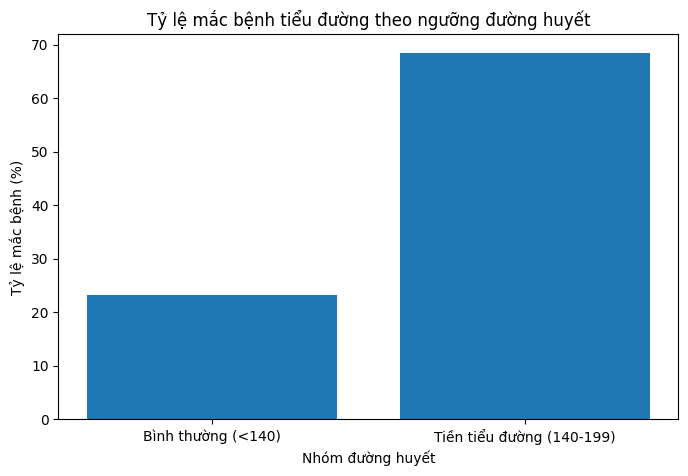

In [4]:
def glucose_category(x):
    if x < 140:
        return "Bình thường (<140)"
    elif 140 <= x < 200:
        return "Tiền tiểu đường (140-199)"
    else:
        return "Tiểu đường (>=200)"

df["Glucose_Level"] = df["Glucose"].apply(glucose_category)

# Thống kê số lượng và tỷ lệ mắc bệnh
summary = df.groupby("Glucose_Level")["Outcome"].agg(
    Tổng_mẫu="count",
    Số_mắc_bệnh="sum",
    Tỷ_lệ_mắc_bệnh=lambda x: round(x.mean()*100,2)
).reset_index()

print(summary)

# Vẽ biểu đồ cột
plt.figure(figsize=(8,5))
plt.bar(summary["Glucose_Level"], summary["Tỷ_lệ_mắc_bệnh"])
plt.title("Tỷ lệ mắc bệnh tiểu đường theo ngưỡng đường huyết")
plt.ylabel("Tỷ lệ mắc bệnh (%)")
plt.xlabel("Nhóm đường huyết")
plt.savefig("phan_nguong_theo_duong_huyet.png")
plt.show()

         Family_History  Tổng_mẫu  Số_mắc_bệnh  Tỷ_lệ_mắc_bệnh
0           Cao (>=1.0)        51           29           56.86
1           Thấp (<0.5)       491          142           28.92
2  Trung bình (0.5-1.0)       226           97           42.92


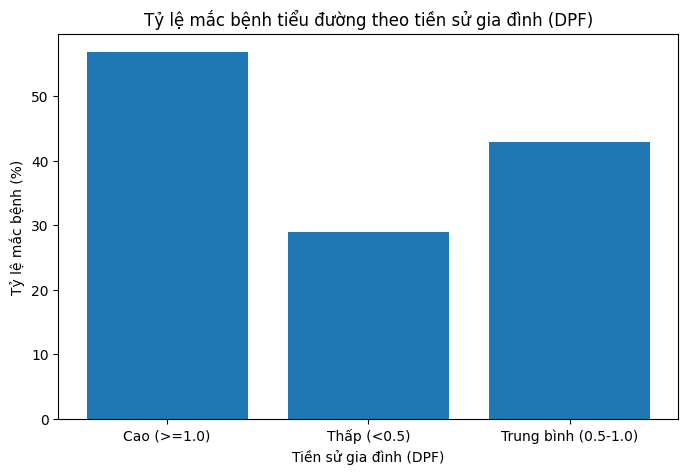

In [5]:
# Phân loại theo tiền sử gia đình (DPF)
def pedigree_category(x):
    if x < 0.5:
        return "Thấp (<0.5)"
    elif 0.5 <= x < 1.0:
        return "Trung bình (0.5-1.0)"
    else:
        return "Cao (>=1.0)"

df["Family_History"] = df["DiabetesPedigreeFunction"].apply(pedigree_category)

# Thống kê
summary = df.groupby("Family_History")["Outcome"].agg(
    Tổng_mẫu="count",
    Số_mắc_bệnh="sum",
    Tỷ_lệ_mắc_bệnh=lambda x: round(x.mean()*100,2)
).reset_index()

print(summary)

# Vẽ biểu đồ
plt.figure(figsize=(8,5))
plt.bar(summary["Family_History"], summary["Tỷ_lệ_mắc_bệnh"])
plt.title("Tỷ lệ mắc bệnh tiểu đường theo tiền sử gia đình (DPF)")
plt.ylabel("Tỷ lệ mắc bệnh (%)")
plt.xlabel("Tiền sử gia đình (DPF)")
plt.savefig("ti_le_theo_tien_su_gia_dinh.png", dpi=300, bbox_inches="tight")
plt.show()